# Rutgers Data Science Capstone

## Exploratory Data Analysis of Airbnb Data

This notebook is in the process of being organized and documented.

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Airbnb Data - bnb

Data provided by Capstone Project - Rutgers University. This is a set of Airbnb listings in New York City.

In [2]:
bnb = pd.read_csv('data/airbnb_eda.csv')

In [3]:
bnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  2018-10-19   
1  Entire home/apt  225.0               1                 45  2019-05-21   
2     Private room   60.0               3                  0         NaN   
3  Entire home/apt   45.0               1                270  2019-07-05   
4  Entire home/apt   80.0              10                  9  2018-11-19   

   reviews_per_month  floor  noise(dB)  \
0               0.21      1  69.056465   
1               0.38      1  56.054278   
2                NaN      1  56.054278   
3               4.64      1  69.056465   
4               0.10      1  56.054278   

                                            Location  
0  807, Friel Place, Brooklyn, Kings County, City...  
1  Bryant Park, 6th Avenue, Manhattan Community B...  
2  25, West 128th Street, Manhattan Community Boa...  
3  188, Gates Avenue, Clinton Hill, Brooklyn, Kin...  
4  1626, Park Avenue, Manhattan Community Board 1...

### Demographic Data - demographics

Data provided by Capstone Project - Rutgers University. This contains demographic data by zip code for many jurisdictions in New York. This is ment to be a supplemental datset to provide more predictive power.

In [4]:
demographics = pd.read_csv('data/Demographic_Statistics_By_Zip_Code.csv')

In [5]:
demographics.head()

JURISDICTION NAME  COUNT PARTICIPANTS  COUNT FEMALE  PERCENT FEMALE  \
0              10001                  44            22            0.50   
1              10002                  35            19            0.54   
2              10003                   1             1            1.00   
3              10004                   0             0            0.00   
4              10005                   2             2            1.00   

   COUNT MALE  PERCENT MALE  COUNT GENDER UNKNOWN  PERCENT GENDER UNKNOWN  \
0          22          0.50                     0                       0   
1          16          0.46                     0                       0   
2           0          0.00                     0                       0   
3           0          0.00                     0                       0   
4           0          0.00                     0                       0   

   COUNT GENDER TOTAL  PERCENT GENDER TOTAL  ...  COUNT CITIZEN STATUS TOTAL  \
0                  44                   100  ...                          44   
1                  35                   100  ...                          35   
2                   1                   100  ...                           1   
3                   0                     0  ...                           0   
4                   2                   100  ...                           2   

   PERCENT CITIZEN STATUS TOTAL  COUNT RECEIVES PUBLIC ASSISTANCE  \
0                           100                                20   
1                           100                                 2   
2                           100                                 0   
3                             0                                 0   
4                           100                                 0   

   PERCENT RECEIVES PUBLIC ASSISTANCE  COUNT NRECEIVES PUBLIC ASSISTANCE  \
0                                0.45                                 24   
1                                0.06                                 33   
2                                0.00                                  1   
3                                0.00                                  0   
4                                0.00                                  2   

   PERCENT NRECEIVES PUBLIC ASSISTANCE  COUNT PUBLIC ASSISTANCE UNKNOWN  \
0                                 0.55                                0   
1                                 0.94                                0   
2                                 1.00                                0   
3                                 0.00                                0   
4                                 1.00                                0   

   PERCENT PUBLIC ASSISTANCE UNKNOWN  COUNT PUBLIC ASSISTANCE TOTAL  \
0                                  0                             44   
1                                  0                             35   
2                                  0                              1   
3                                  0                              0   
4                                  0                              2   

   PERCENT PUBLIC ASSISTANCE TOTAL  
0                              100  
1                              100  
2                              100  
3                                0  
4                              100  

[5 rows x 46 columns]

### Crime Data - crime

Also provided by the Capstone Project, this contains the number of seven major felony offenses in each zip code.

In [6]:
crime = pd.read_csv('data/NYC_Crime_Statistics.csv')

In [7]:
crime.head()

BOROUGH NM  Zip Codes  TOTAL SEVEN MAJOR FELONY OFFENSES
0      Bronx      10467                                356
1      Bronx      10469                                327
2      Bronx      10470                                259
3      Bronx      10471                                245
4      Bronx      10464                                191

In [8]:
crime.sort_values(by='TOTAL SEVEN MAJOR FELONY OFFENSES')

BOROUGH NM  Zip Codes  TOTAL SEVEN MAJOR FELONY OFFENSES
24  Staten Island      10315                                 47
22  Staten Island      10307                                 51
19         Queens      11411                                 70
23  Staten Island      10309                                 79
21  Staten Island      10302                                 91
18         Queens      11373                                 91
14      Manhattan      10027                                 91
20  Staten Island      10311                                108
13      Manhattan      10026                                109
12      Manhattan      10025                                157
11      Manhattan      10014                                185
17         Queens      11372                                191
4           Bronx      10464                                191
3           Bronx      10471                                245
2           Bronx      10470                                259
16         Queens      11354                                281
10      Manhattan      10013                                289
15         Queens      11106                                309
1           Bronx      10469                                327
0           Bronx      10467                                356
9        Brooklyn      11238                                379
8        Brooklyn      11237                                391
7        Brooklyn      11226                                417
6        Brooklyn      11225                                429
5        Brooklyn      11224                                431

In [9]:
locations = pd.read_excel('data/nyc_locations.xlsx')

In [10]:
locations

Point of Interest             Coordinates
0                    9/11 Memorial Museum                     NaN
1          The Metropolitan Museum of Art                     NaN
2                            Central Park                     NaN
3                   Empire State Building                     NaN
4                          Yankee Stadium                     NaN
5                       Statue of Liberty  40.6892° N, 74.0445° W
6                      Rockefeller Center  40.7587° N, 73.9787° W
7                         Top of The Rock                     NaN
8                  One World Trade Center                     NaN
9                            Times Square                     NaN
10                        Brooklyn Bridge                     NaN
11                  Madison Square Garden  40.7593° N, 73.9794° W
12                 Grand Central Terminal  40.7593° N, 73.9794° W
13               New York Hall of Science                     NaN
14                               Broadway  40.7908° N, 73.9747° W
15  John F. Kennedy International Airport  40.6413° N, 73.7781° W
16                                    NaN                     NaN
17                                    NaN                     NaN
18                                    NaN                     NaN
19                                    NaN                     NaN
20                                    NaN                     NaN
21                                    NaN                     NaN
22                                    NaN                     NaN
23                                    NaN                     NaN
24                                    NaN                     NaN
25                                    NaN                     NaN

In [11]:
locations.loc[0]['Coordinates'] = '40.7115° N, 74.0123° W'

In [12]:
locations.loc[1]['Coordinates'] = '40.7800° N, -73.9632° W'

In [13]:
locations.loc[3]['Coordinates']='40.7484° N, -73.9855° W'

In [14]:
locations.loc[4]['Coordinates']='40.8296° N, -73.9261° W'

In [15]:
locations.loc[7]['Coordinates']='40.7593° N, -73.9793° W'

In [16]:
locations.loc[8]['Coordinates']='40.7128° N, -74.0133° W'

In [17]:
locations.loc[9]['Coordinates']='40.7560, -73.9869'

In [18]:
locations.loc[10]['Coordinates']='40.7061, -73.9968'

In [19]:
locations.loc[13]['Coordinates']='40.7472, -73.8523'

In [20]:
locations = locations[0:16]

In [21]:
locations

Point of Interest              Coordinates
0                    9/11 Memorial Museum   40.7115° N, 74.0123° W
1          The Metropolitan Museum of Art  40.7800° N, -73.9632° W
2                            Central Park                      NaN
3                   Empire State Building  40.7484° N, -73.9855° W
4                          Yankee Stadium  40.8296° N, -73.9261° W
5                       Statue of Liberty   40.6892° N, 74.0445° W
6                      Rockefeller Center   40.7587° N, 73.9787° W
7                         Top of The Rock  40.7593° N, -73.9793° W
8                  One World Trade Center  40.7128° N, -74.0133° W
9                            Times Square        40.7560, -73.9869
10                        Brooklyn Bridge        40.7061, -73.9968
11                  Madison Square Garden   40.7593° N, 73.9794° W
12                 Grand Central Terminal   40.7593° N, 73.9794° W
13               New York Hall of Science        40.7472, -73.8523
14                               Broadway   40.7908° N, 73.9747° W
15  John F. Kennedy International Airport   40.6413° N, 73.7781° W

In [22]:
demographics.columns

Index(['JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE',
       'PERCENT FEMALE', 'COUNT MALE', 'PERCENT MALE', 'COUNT GENDER UNKNOWN',
       'PERCENT GENDER UNKNOWN', 'COUNT GENDER TOTAL', 'PERCENT GENDER TOTAL',
       'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO',
       'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN',
       'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC',
       'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC',
       'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC',
       'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY',
       'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN',
       'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL',
       'COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN',
       'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKN

In [23]:
bnb.dtypes

id                       int64
name                    object
host_id                  int64
host_name               object
neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                  float64
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
floor                    int64
noise(dB)              float64
Location                object
dtype: object

In [24]:
bnb['last_review'] = pd.to_datetime(bnb['last_review'])

In [25]:
bnb.isna().sum()

id                        0
name                     14
host_id                   0
host_name                16
neighbourhood_group       0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
last_review            7978
reviews_per_month      7978
floor                     0
noise(dB)                 0
Location                  0
dtype: int64

In [26]:
bnb.loc[bnb.duplicated()]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, floor, noise(dB), Location]
Index: []

In [27]:
bnb.loc[bnb.duplicated(subset = ['name'])]

id                                               name    host_id  \
476      219818                 ✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿    1138692   
553      253471                   Loft Suite @ The Box House Hotel     417504   
557      253806                   Loft Suite @ The Box House Hotel     417504   
558      253811                   Loft Suite @ The Box House Hotel     417504   
559      253815                   Loft Suite @ The Box House Hotel     417504   
...         ...                                                ...        ...   
38934  36372006  Very Clean Private Room Near Buses & Restauran...  118405437   
38949  36382847                                       Comfort home  266211707   
38987  36412461  Sunny, Cozy, Private Room In The Heart of Bush...  147515897   
39006  36420404                                    Home Sweet Home  273656890   
39032  36427922                                Home away from home  238163900   

                 host_name neighbourhood_group    neighbourhood  latitude  \
476           Keera (Jena)           Manhattan  Lower East Side  40.71892   
553    The Box House Hotel            Brooklyn       Greenpoint  40.73641   
557    The Box House Hotel            Brooklyn       Greenpoint  40.73652   
558    The Box House Hotel            Brooklyn       Greenpoint  40.73693   
559    The Box House Hotel            Brooklyn       Greenpoint  40.73784   
...                    ...                 ...              ...       ...   
38934               PengYu              Queens        Woodhaven  40.69411   
38949                  Yan            Brooklyn      Sunset Park  40.64439   
38987               Flávia            Brooklyn         Bushwick  40.70366   
39006                Liana           Manhattan      East Harlem  40.79266   
39032                 Lucy              Queens  Cambria Heights  40.68557   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
476    -73.98401  Entire home/apt  199.0               1                 14   
553    -73.95330  Entire home/apt  199.0               3                 24   
557    -73.95236  Entire home/apt  199.0               3                 43   
558    -73.95316  Entire home/apt  199.0               3                 30   
559    -73.95324  Entire home/apt  199.0               3                 39   
...          ...              ...    ...             ...                ...   
38934  -73.86877     Private room   66.0               1                  0   
38949  -74.01816     Private room  185.0               1                  0   
38987  -73.92728     Private room   42.0               3                  0   
39006  -73.94740     Private room   50.0               1                  0   
39032  -73.72731     Private room   50.0               3                  0   

      last_review  reviews_per_month  floor  noise(dB)  \
476    2015-07-20               0.15      1  56.054278   
553    2018-11-06               0.32      1  69.056465   
557    2019-07-02               0.47      1  69.056465   
558    2019-07-03               0.32      1  69.056465   
559    2019-06-29               0.44      1  69.056465   
...           ...                ...    ...        ...   
38934         NaT                NaN      5  62.478632   
38949         NaT                NaN      1  69.056465   
38987         NaT                NaN      1  69.056465   
39006         NaT                NaN      1  56.054278   
39032         NaT                NaN      5  62.478632   

                                                Location  
476    P.S. 140 Nathan Straus, 123, Ridge Street, Man...  
553    120, Clay Street, Brooklyn, Kings County, City...  
557    394, McGuinness Boulevard, Brooklyn, Kings Cou...  
558    McGuinness Boulevard, Brooklyn, Kings County, ...  
559    McGuinness Boulevard, Brooklyn, Kings County, ...  
...                                                  ...  
38934  Woodhull Way, Brooklyn, Kings County, City of ...

In [28]:
bnb.query('name == "Comfort home"')

id          name    host_id host_name neighbourhood_group  \
38944  36381008  Comfort home  266211707       Yan            Brooklyn   
38949  36382847  Comfort home  266211707       Yan            Brooklyn   

      neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
38944   Sunset Park  40.64454  -74.02010  Private room  185.0               1   
38949   Sunset Park  40.64439  -74.01816  Private room  185.0               1   

       number_of_reviews last_review  reviews_per_month  floor  noise(dB)  \
38944                  0         NaT                NaN      1  69.056465   
38949                  0         NaT                NaN      1  69.056465   

                                                Location  
38944  238, 57th Street, Brooklyn, Kings County, City...  
38949  275, 56th Street, Brooklyn, Kings County, City...

### Univariate Analysis

#### Price

Text(0, 0.5, 'Price')

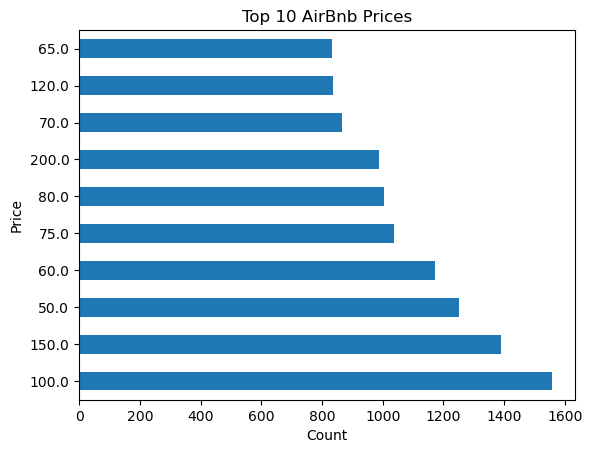

In [29]:
ax = bnb['price'].value_counts() \
    .head(10) \
    .plot(kind='barh', title = 'Top 10 AirBnb Prices')
ax.set_xlabel('Count')
ax.set_ylabel('Price')

<Axes: ylabel='Frequency'>

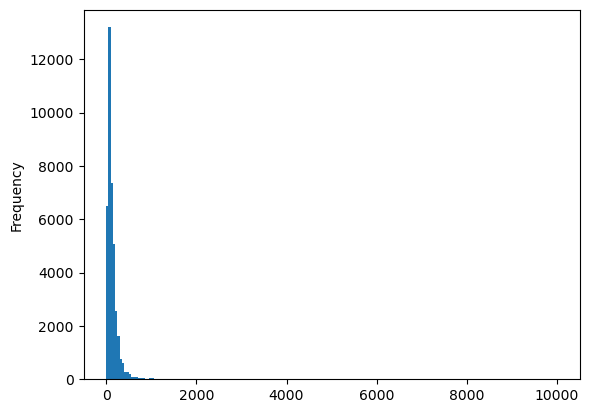

In [30]:
bnb['price'].plot(kind='hist',bins=200)

<Axes: ylabel='Frequency'>

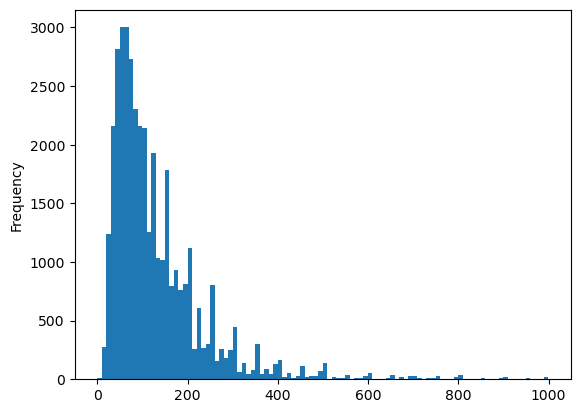

In [31]:
bnb[bnb['price']<1000]['price'].plot(kind='hist',
                  bins=100)

<Axes: ylabel='Density'>

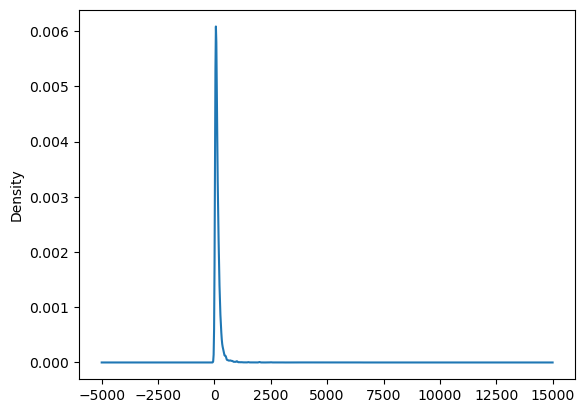

In [32]:
bnb['price'].plot(kind='kde')

#### Name

Text(0, 0.5, 'Name')

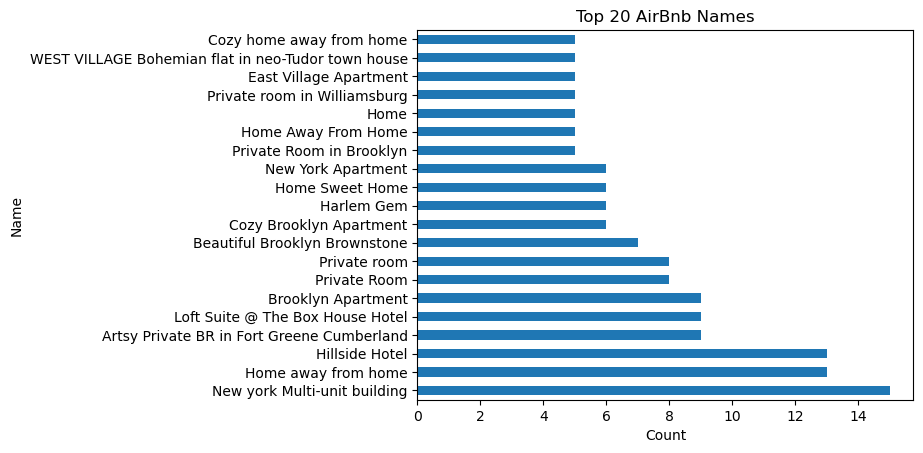

In [33]:
ax = bnb['name'].value_counts() \
    .head(20) \
    .plot(kind='barh', title = 'Top 20 AirBnb Names')
ax.set_xlabel('Count')
ax.set_ylabel('Name')

#### Host ID

Text(0, 0.5, 'Count')

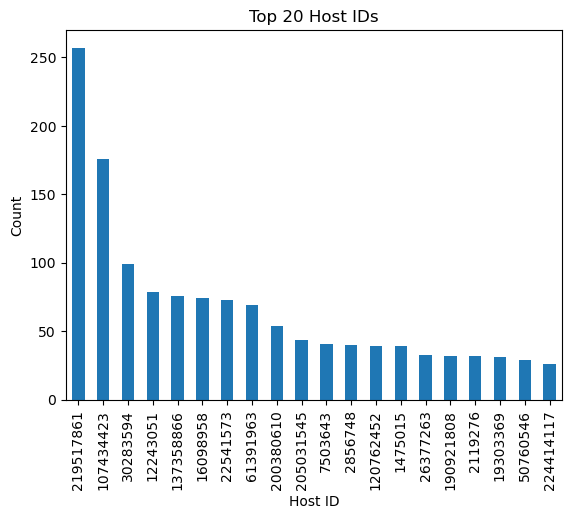

In [34]:
ax = bnb['host_id'].value_counts() \
    .head(20) \
    .plot(kind='bar', title = 'Top 20 Host IDs')
ax.set_xlabel('Host ID')
ax.set_ylabel('Count')

#### Host Names

Text(0, 0.5, 'Host Name')

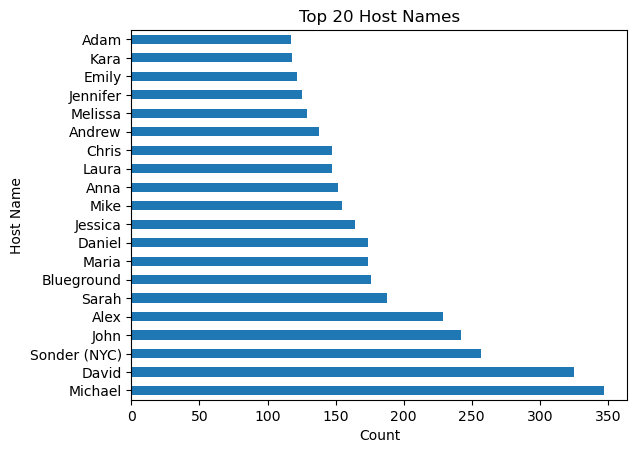

In [35]:
ax = bnb['host_name'].value_counts() \
    .head(20) \
    .plot(kind='barh', title = 'Top 20 Host Names')
ax.set_xlabel('Count')
ax.set_ylabel('Host Name')

It might be interesting here to match the host id to the name, and look at the top ten. That could show its not just a common name, but this is the name of the persons with the most postings.

Text(0, 0.5, 'Borough')

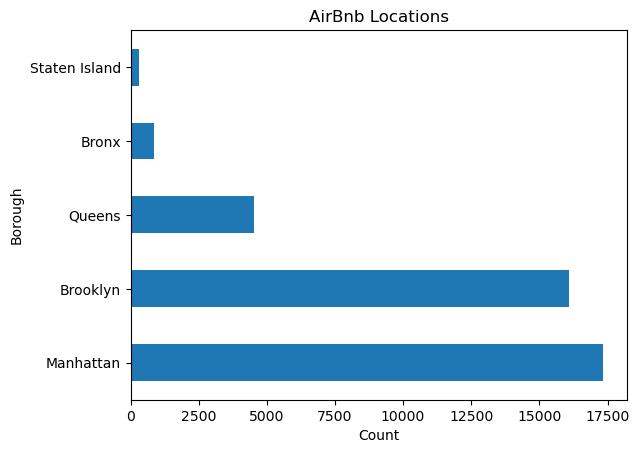

In [36]:
ax = bnb['neighbourhood_group'].value_counts() \
    .plot(kind='barh', title = 'AirBnb Locations')
ax.set_xlabel('Count')
ax.set_ylabel('Borough')

#### Neighbourhoods

Text(0, 0.5, 'Neighbourhood')

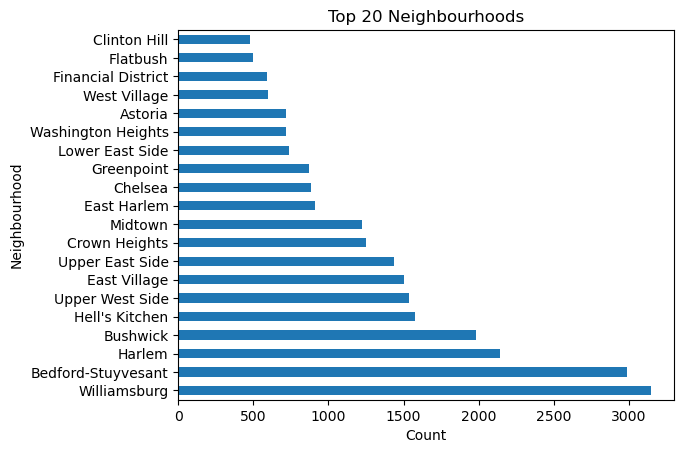

In [37]:
ax = bnb['neighbourhood'].value_counts() \
    .head(20) \
    .plot(kind='barh', title = 'Top 20 Neighbourhoods')
ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhood')

In [38]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

#### Latitude

Text(0, 0.5, 'Latitude')

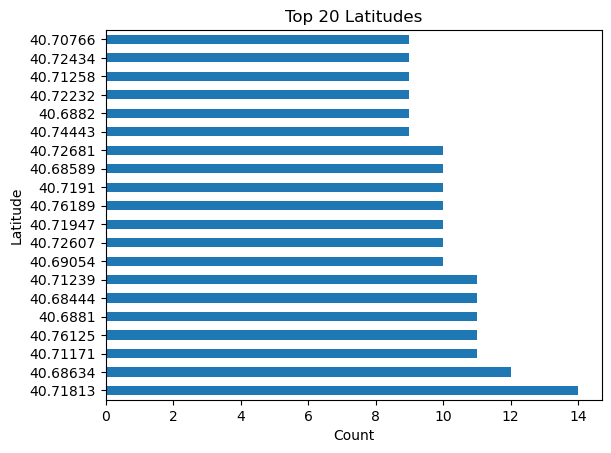

In [39]:
ax = bnb['latitude'].value_counts() \
    .head(20) \
    .plot(kind='barh', title = 'Top 20 Latitudes')
ax.set_xlabel('Count')
ax.set_ylabel('Latitude')

Text(0.5, 0, 'Latitude')

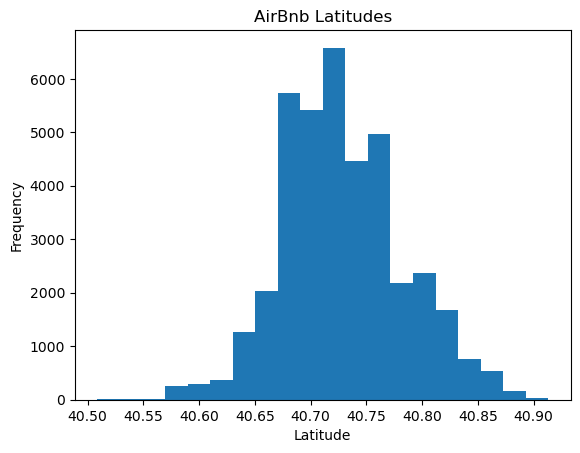

In [40]:
ax = bnb['latitude'].plot(kind='hist',
                          bins=20,
                          title='AirBnb Latitudes')
ax.set_xlabel('Latitude')

Text(0.5, 0, 'Latitude')

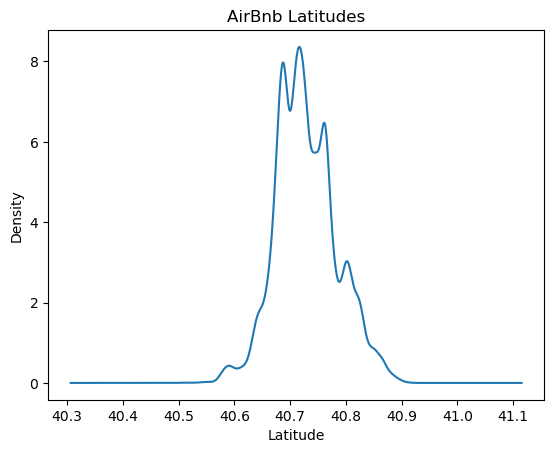

In [41]:
ax = bnb['latitude'].plot(kind='kde',
                          title='AirBnb Latitudes')
ax.set_xlabel('Latitude')

#### Longitude

Text(0, 0.5, 'Longitude')

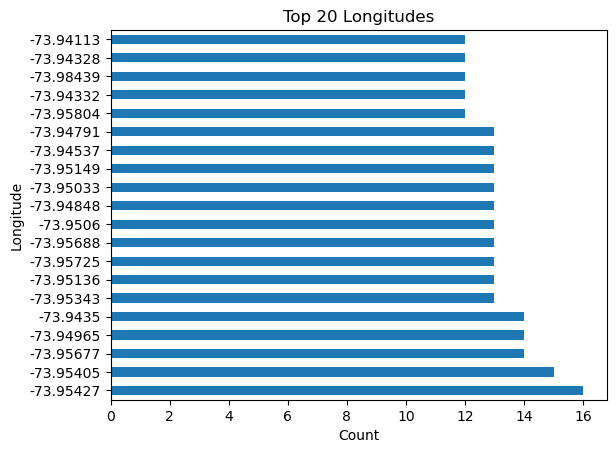

In [42]:
ax = bnb['longitude'].value_counts() \
    .head(20) \
    .plot(kind='barh', title = 'Top 20 Longitudes')
ax.set_xlabel('Count')
ax.set_ylabel('Longitude')

Text(0.5, 0, 'Longitude')

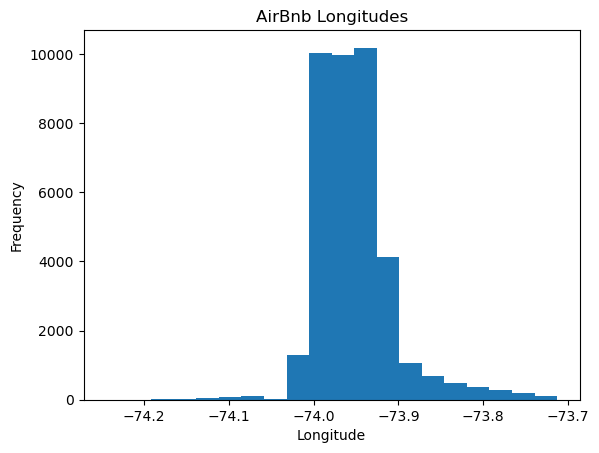

In [43]:
ax = bnb['longitude'].plot(kind='hist',
                          bins=20,
                          title='AirBnb Longitudes')
ax.set_xlabel('Longitude')

Text(0.5, 0, 'Longitudes')

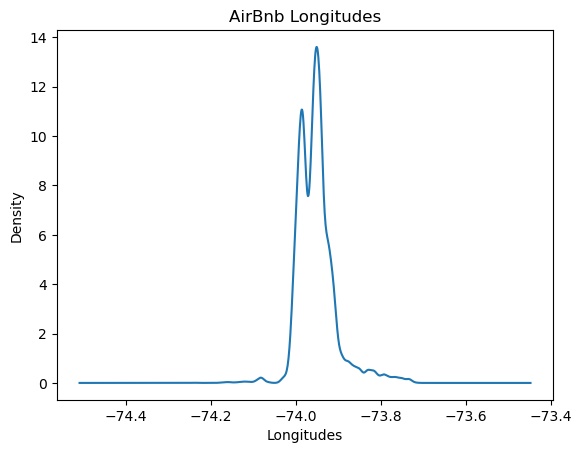

In [44]:
ax = bnb['longitude'].plot(kind='kde',
                          title='AirBnb Longitudes')
ax.set_xlabel('Longitudes')

Between the longitude and latitude it appears there are more airbnbs on the upper east side potentially

In [45]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

#### Room Type

Text(0, 0.5, 'Room Type')

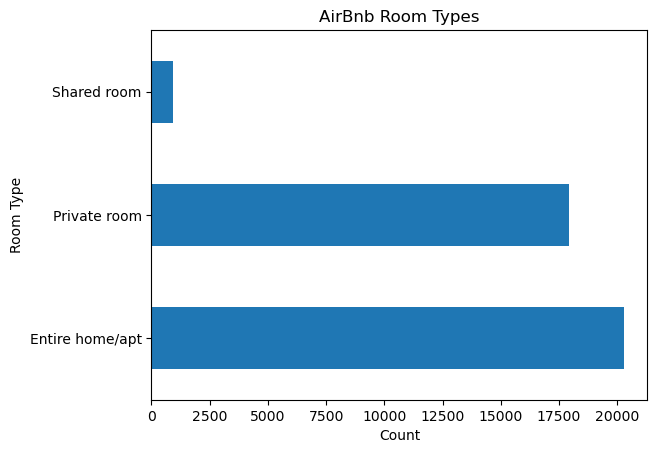

In [46]:
ax = bnb['room_type'].value_counts() \
    .plot(kind='barh', title = 'AirBnb Room Types')
ax.set_xlabel('Count')
ax.set_ylabel('Room Type')

#### Minimum Nights

Text(0, 0.5, 'Counts')

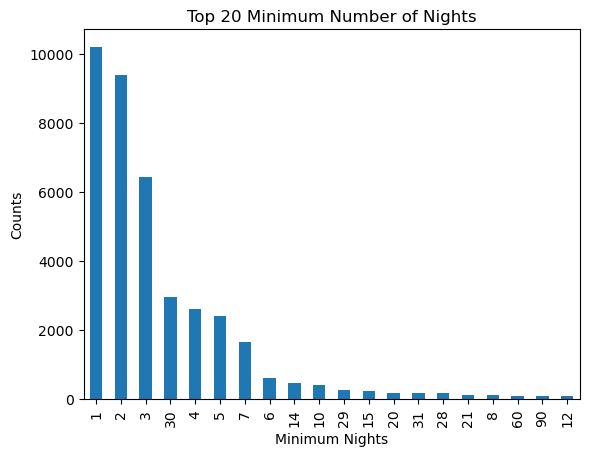

In [47]:
ax = bnb['minimum_nights'].value_counts() \
    .head(20) \
    .plot(kind='bar', title = 'Top 20 Minimum Number of Nights')
ax.set_xlabel('Minimum Nights')
ax.set_ylabel('Counts')

fix the numbers on the x axis

Text(0.5, 0, 'Minimum Nights')

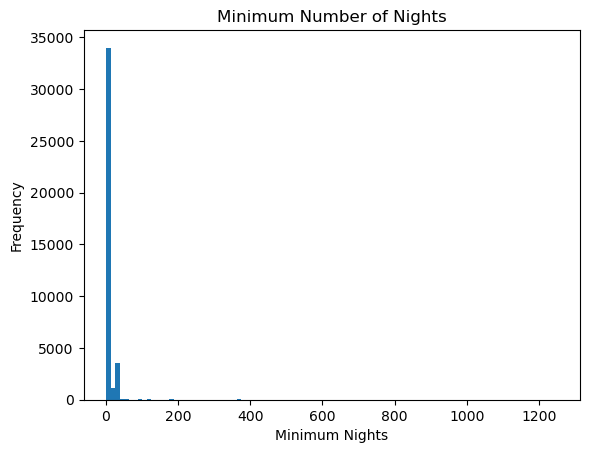

In [48]:
ax = bnb['minimum_nights'].plot(kind='hist',
                          bins=100,
                          title='Minimum Number of Nights')
ax.set_xlabel('Minimum Nights')

Text(0.5, 0, 'Minimum Nights')

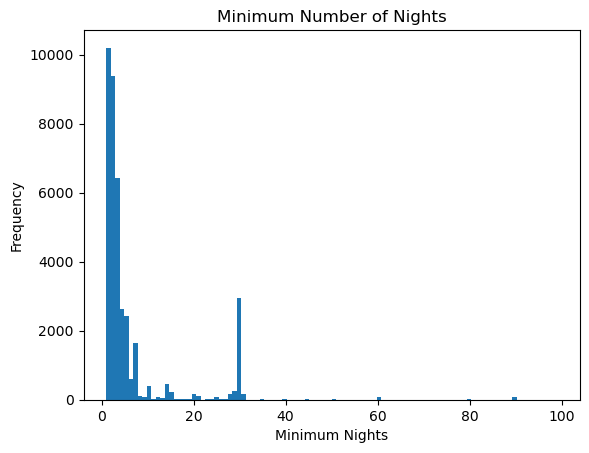

In [49]:
ax = bnb[bnb['minimum_nights'] < 100]['minimum_nights'].plot(kind='hist',
                          bins=100,
                          title='Minimum Number of Nights')
ax.set_xlabel('Minimum Nights')

Text(0.5, 0, 'Minimum Nights')

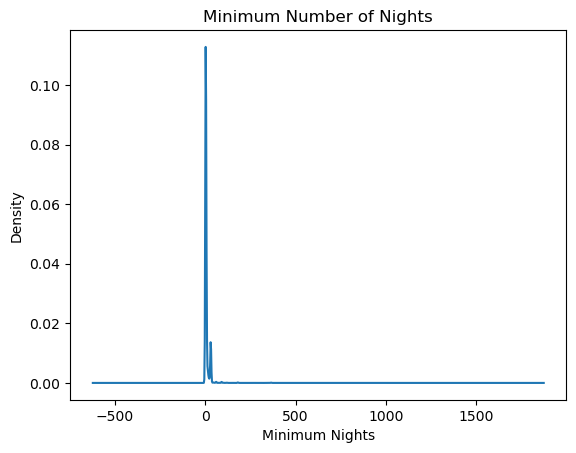

In [50]:
ax = bnb['minimum_nights'].plot(kind='kde',
                          title='Minimum Number of Nights')
ax.set_xlabel('Minimum Nights')

In [51]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

#### Number of Reviews

Text(0, 0.5, 'Counts')

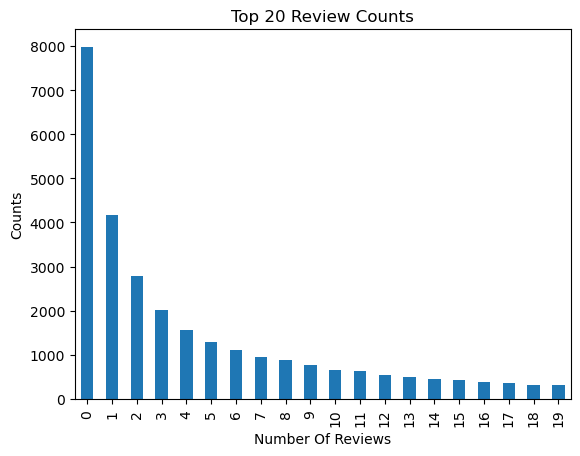

In [52]:
ax = bnb['number_of_reviews'].value_counts() \
    .head(20) \
    .plot(kind='bar', title = 'Top 20 Review Counts')
ax.set_xlabel('Number Of Reviews')
ax.set_ylabel('Counts')

Text(0.5, 0, 'Number of Reviews')

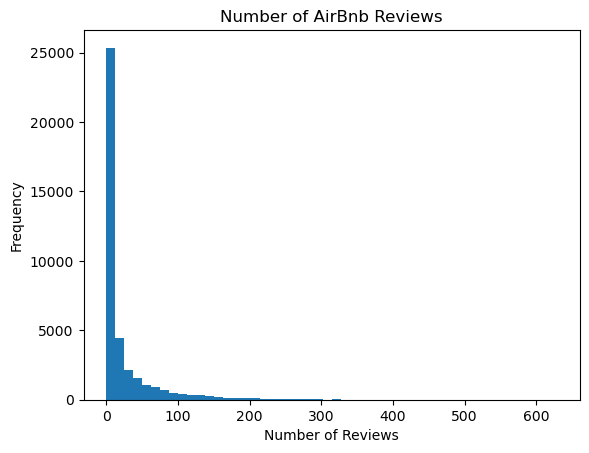

In [53]:
ax = bnb['number_of_reviews'].plot(kind='hist',
                          bins=50,
                          title='Number of AirBnb Reviews')
ax.set_xlabel('Number of Reviews')

Text(0.5, 0, 'Number of Reviews')

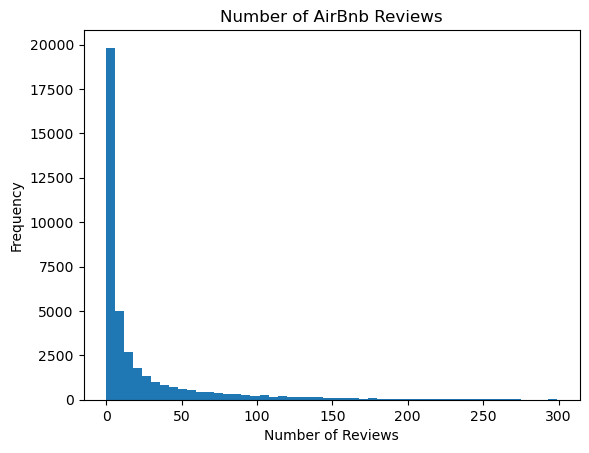

In [54]:
ax = bnb[bnb['number_of_reviews']<300]['number_of_reviews'].plot(kind='hist',
                          bins=50,
                          title='Number of AirBnb Reviews')
ax.set_xlabel('Number of Reviews')

Text(0.5, 0, 'Number of Reviews')

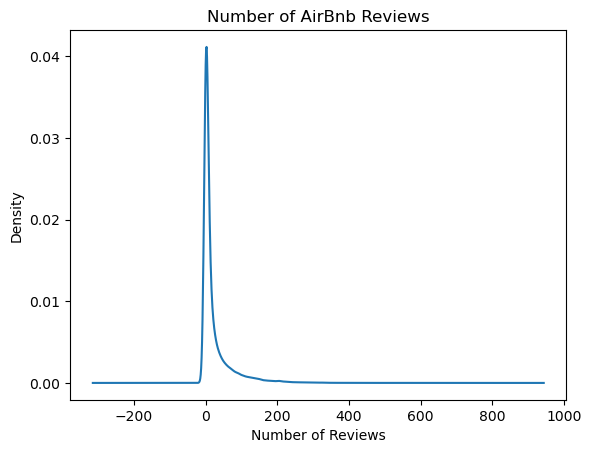

In [55]:
ax = bnb['number_of_reviews'].plot(kind='kde',
                          title='Number of AirBnb Reviews')
ax.set_xlabel('Number of Reviews')

In [56]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

#### Last Review

In [57]:
### Come back to this after learning about ploting TIMESERIES

#### Reviews Per Month

Text(0, 0.5, 'Counts')

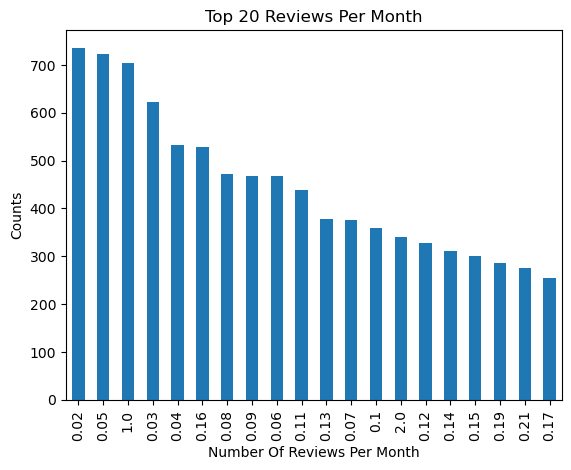

In [58]:
ax = bnb['reviews_per_month'].value_counts() \
    .head(20) \
    .plot(kind='bar', title = 'Top 20 Reviews Per Month')
ax.set_xlabel('Number Of Reviews Per Month')
ax.set_ylabel('Counts')

Text(0.5, 0, 'Reviews Per Month')

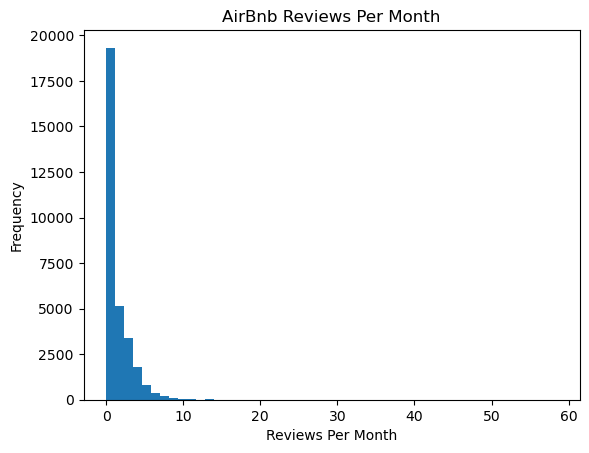

In [59]:
ax = bnb['reviews_per_month'].plot(kind='hist',
                          bins=50,
                          title='AirBnb Reviews Per Month')
ax.set_xlabel('Reviews Per Month')

Text(0.5, 0, 'Reviews Per Month')

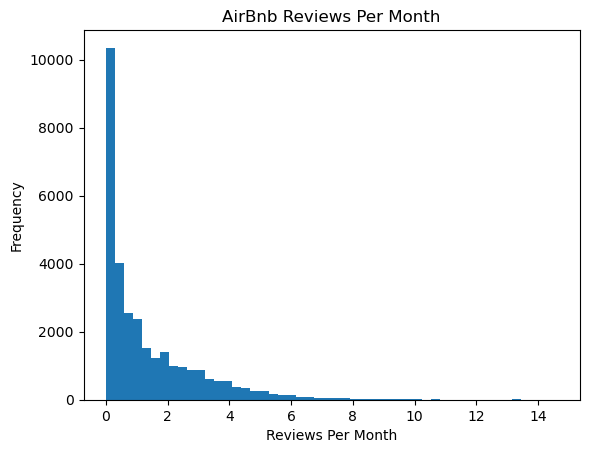

In [60]:
ax = bnb[bnb['reviews_per_month']<15]['reviews_per_month'].plot(kind='hist',
                          bins=50,
                          title='AirBnb Reviews Per Month')
ax.set_xlabel('Reviews Per Month')

Text(0.5, 0, 'Reviews Per Month')

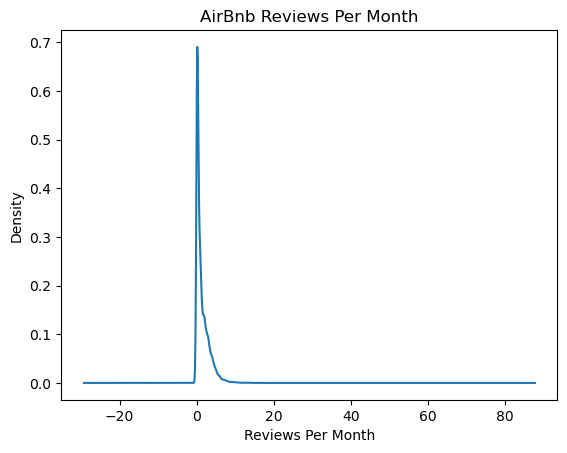

In [61]:
ax = bnb['reviews_per_month'].plot(kind='kde',
                          title='AirBnb Reviews Per Month')
ax.set_xlabel('Reviews Per Month')

In [62]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

#### Floor

Text(0, 0.5, 'Counts')

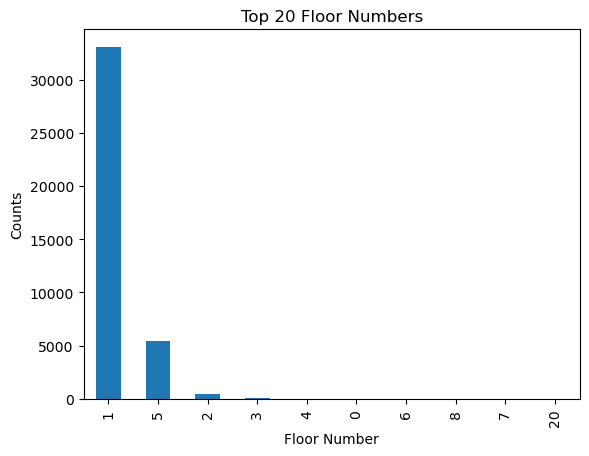

In [63]:
ax = bnb['floor'].value_counts() \
    .head(10) \
    .plot(kind='bar', title = 'Top 20 Floor Numbers')
ax.set_xlabel('Floor Number')
ax.set_ylabel('Counts')

Text(0.5, 0, 'Floor Number')

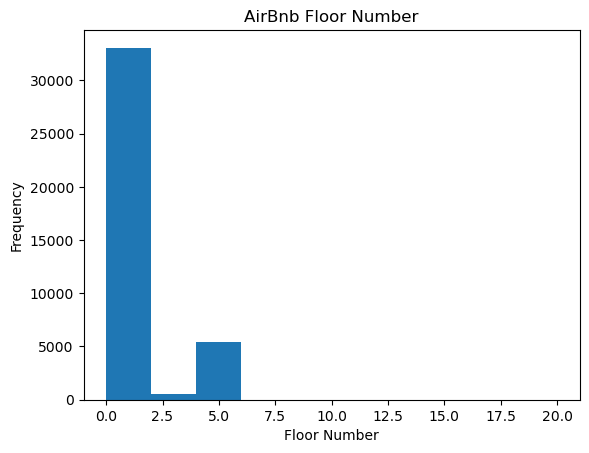

In [64]:
ax = bnb['floor'].plot(kind='hist',
                          bins=10,
                          title='AirBnb Floor Number')
ax.set_xlabel('Floor Number')

Text(0.5, 0, 'Floor Number')

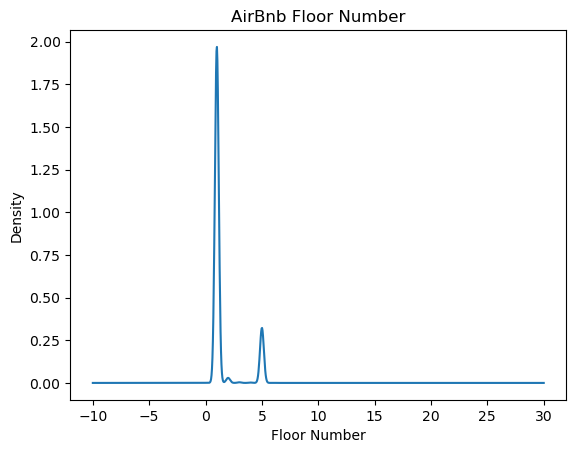

In [65]:
ax = bnb['floor'].plot(kind='kde',
                          title='AirBnb Floor Number')
ax.set_xlabel('Floor Number')

In [66]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

#### Noise

Text(0, 0.5, 'Noise (dB)')

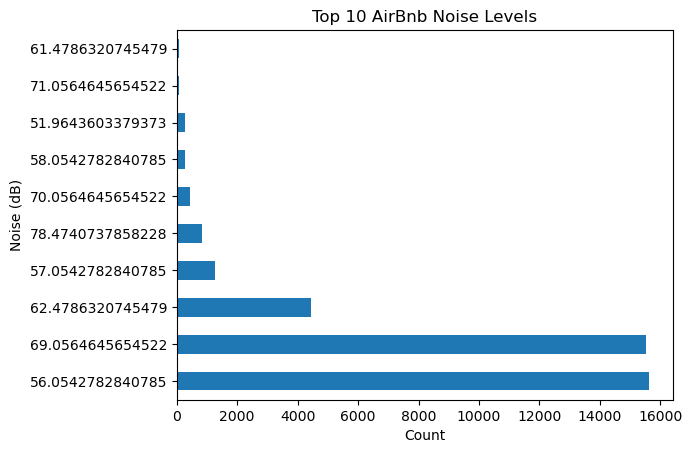

In [67]:
ax = bnb['noise(dB)'].value_counts() \
    .head(10) \
    .plot(kind='barh', title = 'Top 10 AirBnb Noise Levels')
ax.set_xlabel('Count')
ax.set_ylabel('Noise (dB)')

Text(0.5, 0, 'Noise (dB)')

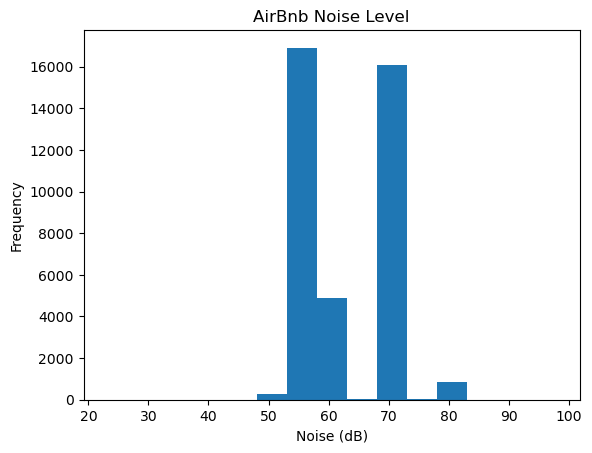

In [68]:
ax = bnb['noise(dB)'].plot(kind='hist',
                          bins=15,
                          title='AirBnb Noise Level')
ax.set_xlabel('Noise (dB)')

Text(0.5, 0, 'Noise (dB)')

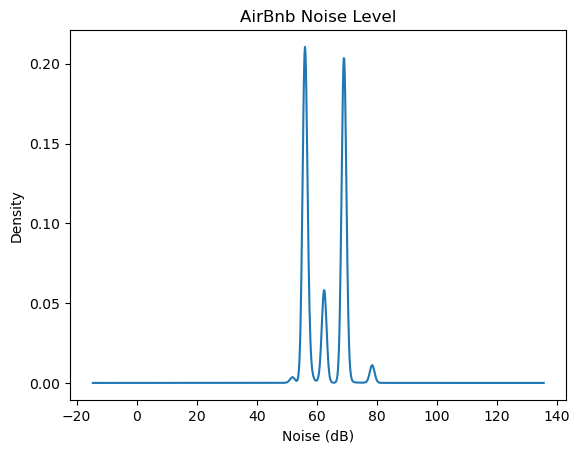

In [69]:
ax = bnb['noise(dB)'].plot(kind='kde',
                          title='AirBnb Noise Level')
ax.set_xlabel('Noise (dB)')

In [70]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

#### Location

Text(0, 0.5, 'Location')

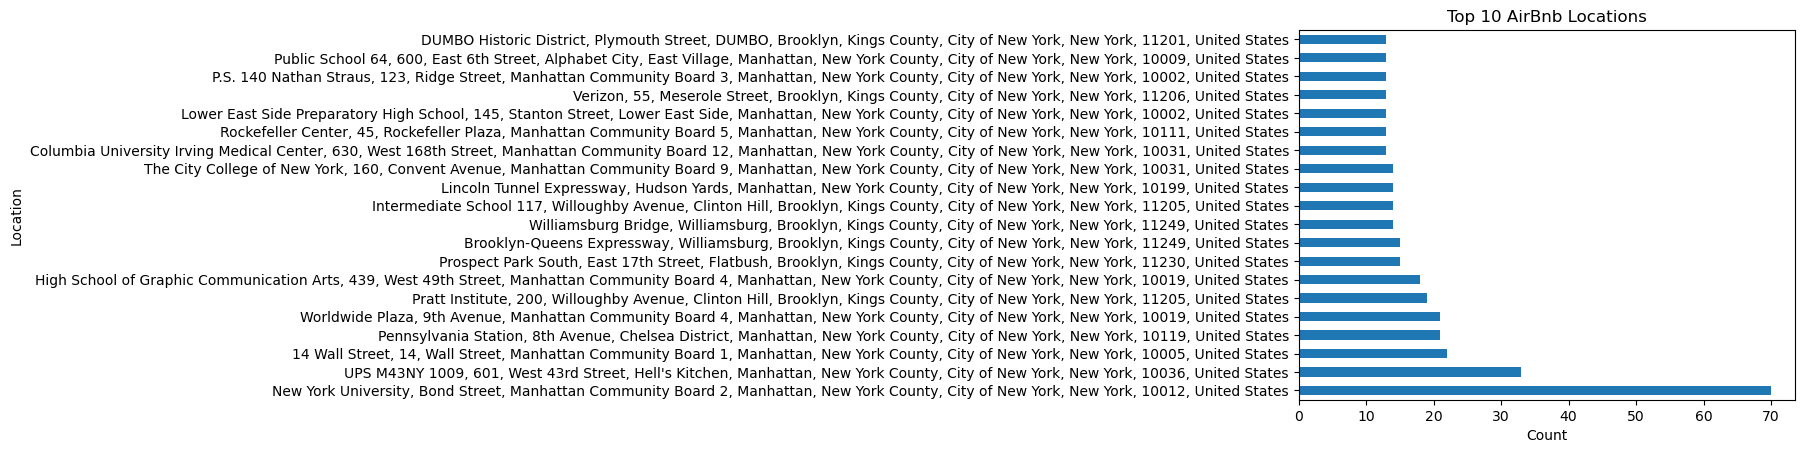

In [71]:
ax = bnb['Location'].value_counts() \
    .head(20) \
    .plot(kind='barh', title = 'Top 10 AirBnb Locations')
ax.set_xlabel('Count')
ax.set_ylabel('Location')

See if NYU address here is all from the same host, host id, or name

### Multivariate Analysis

In [72]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

In [73]:
# plot the prices of the top 5 names

In [74]:
list(bnb['name'].value_counts().head(5).index)

['New york Multi-unit building',
 'Home away from home',
 'Hillside Hotel',
 'Artsy Private BR in Fort Greene Cumberland',
 'Loft Suite @ The Box House Hotel']

#### Host ID ~ Price

<Axes: xlabel='host_id', ylabel='price'>

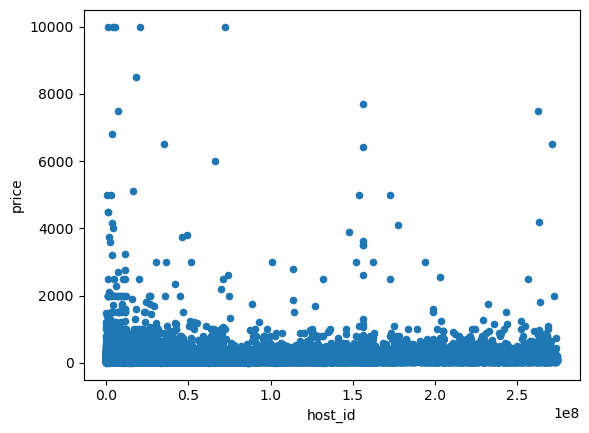

In [76]:
bnb.plot(kind = 'scatter',
        x = 'host_id',
        y = 'price')

#### Latitude ~ Price

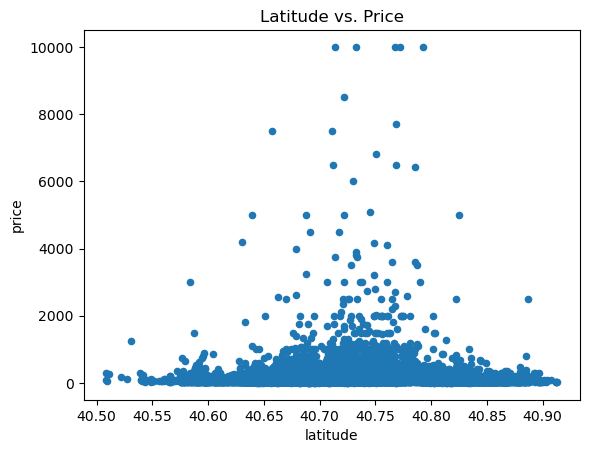

In [77]:
bnb.plot(kind = 'scatter',
        x = 'latitude',
        y = 'price',
        title = 'Latitude vs. Price')
plt.show()

#### Longitude ~ Price

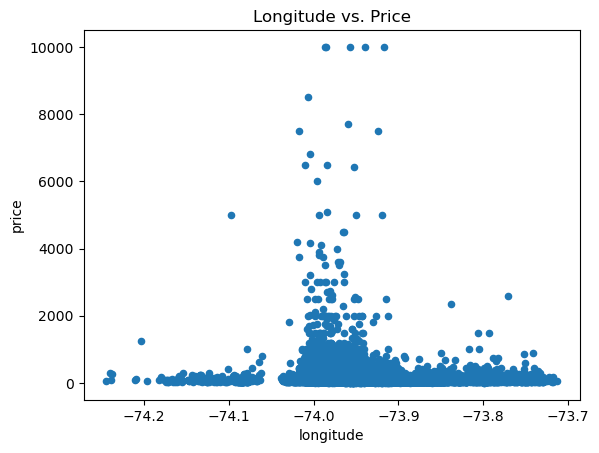

In [78]:
bnb.plot(kind = 'scatter',
        x = 'longitude',
        y = 'price',
        title = 'Longitude vs. Price')
plt.show()

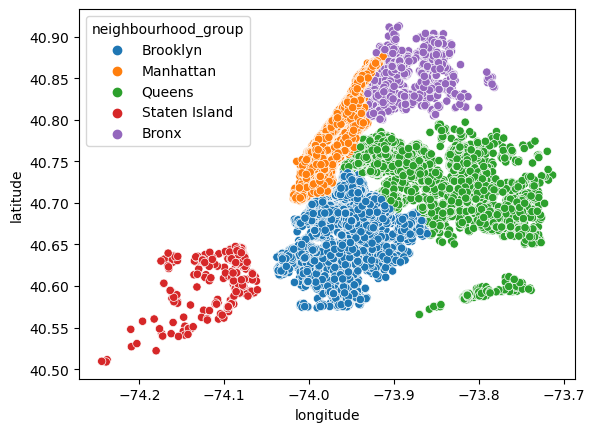

In [79]:
sns.scatterplot(x = 'longitude',
                y ='latitude',
                hue='neighbourhood_group',
                data=bnb)
plt.show()

In [80]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

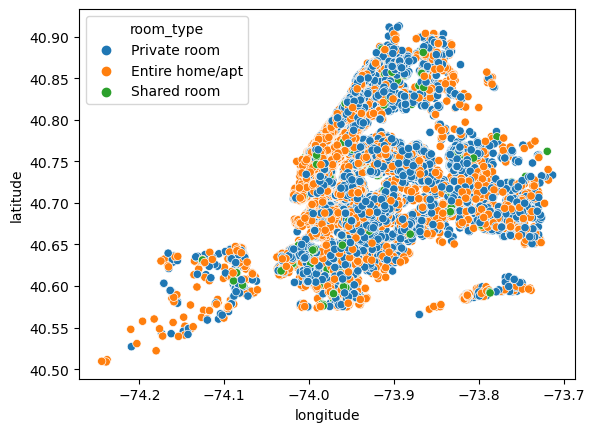

In [81]:
sns.scatterplot(x = 'longitude',
                y ='latitude',
                hue='room_type',
                data=bnb)
plt.show()

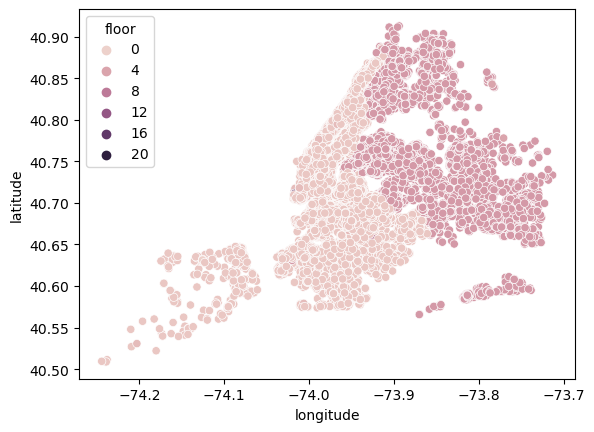

In [82]:
sns.scatterplot(x = 'longitude',
                y ='latitude',
                hue='floor',
                data=bnb)
plt.show()

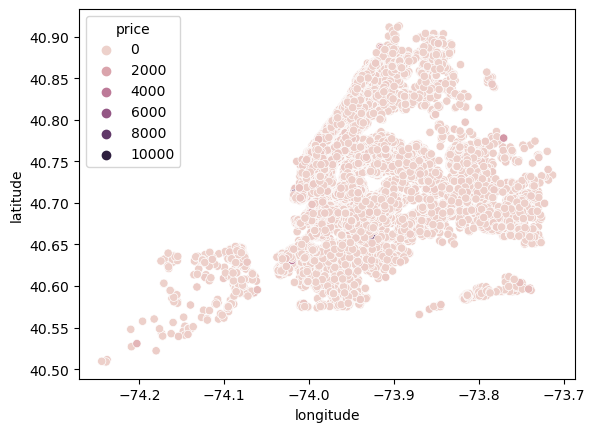

In [83]:
sns.scatterplot(x = 'longitude',
                y ='latitude',
                hue='price',
                data=bnb)
plt.show()

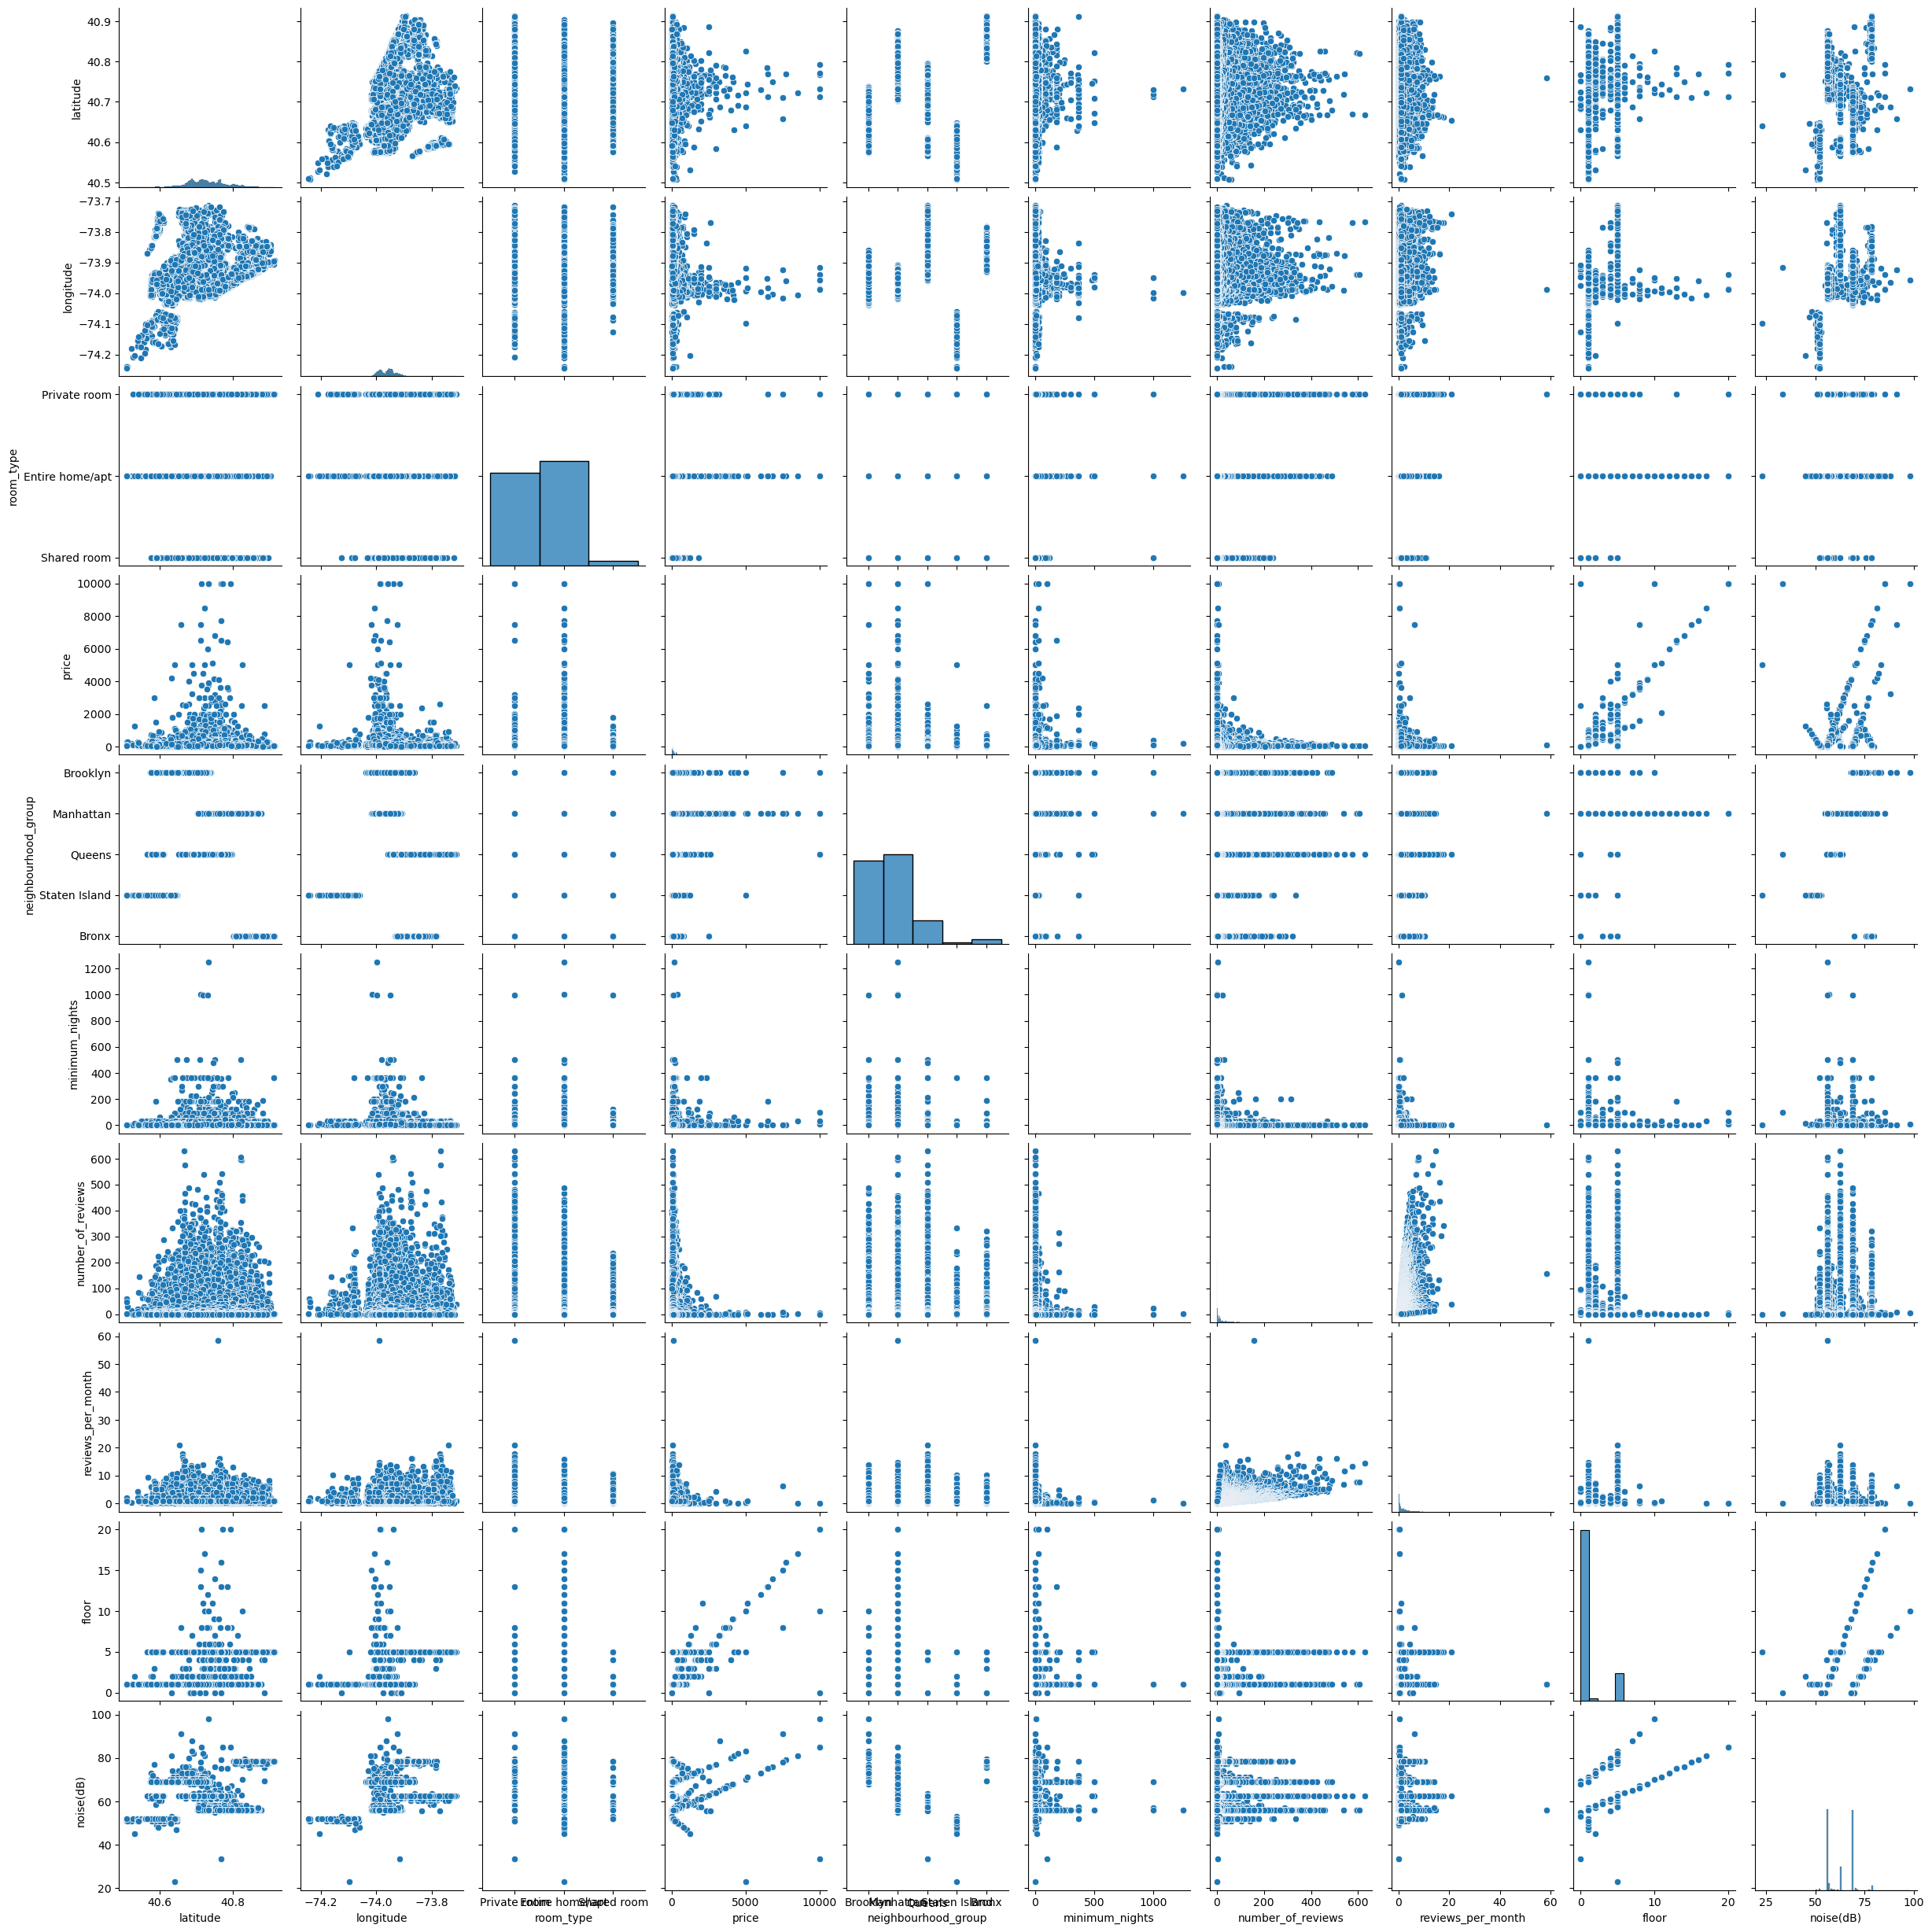

In [84]:
sns.pairplot(bnb, vars=['latitude','longitude', 'room_type',
                        'price', 'neighbourhood_group', 'minimum_nights',
                        'number_of_reviews','reviews_per_month', 'floor', 'noise(dB)'])
plt.show()

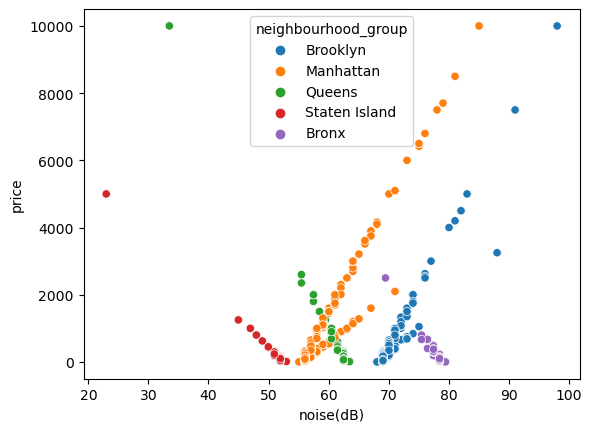

In [85]:
sns.scatterplot(x = 'noise(dB)',
                y ='price',
                hue='neighbourhood_group',
                data=bnb)
plt.show()

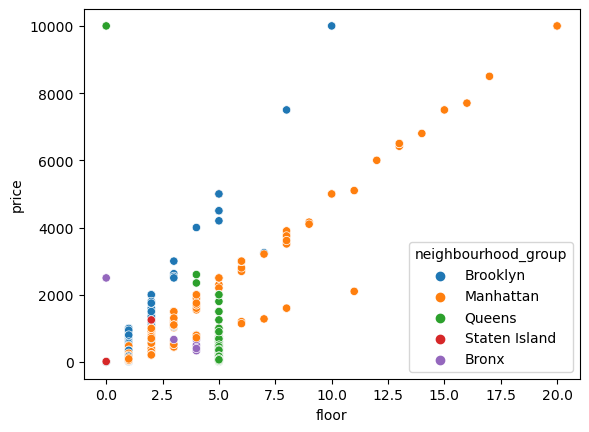

In [86]:
sns.scatterplot(x = 'floor',
                y ='price',
                hue='neighbourhood_group',
                data=bnb)
plt.show()

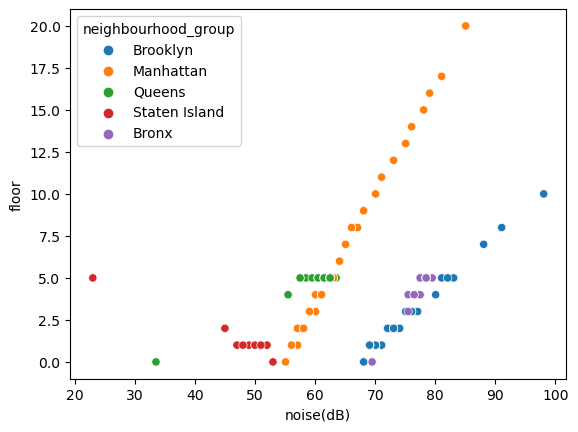

In [87]:
sns.scatterplot(x = 'noise(dB)',
                y ='floor',
                hue='neighbourhood_group',
                data=bnb)
plt.show()

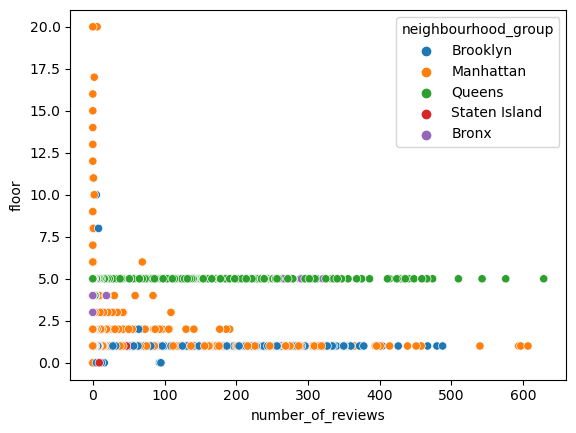

In [88]:
sns.scatterplot(x = 'number_of_reviews',
                y ='floor',
                hue='neighbourhood_group',
                data=bnb)
plt.show()

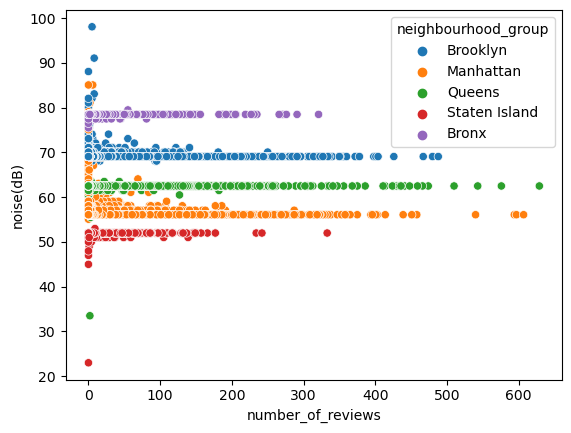

In [89]:
sns.scatterplot(x = 'number_of_reviews',
                y ='noise(dB)',
                hue='neighbourhood_group',
                data=bnb)
plt.show()

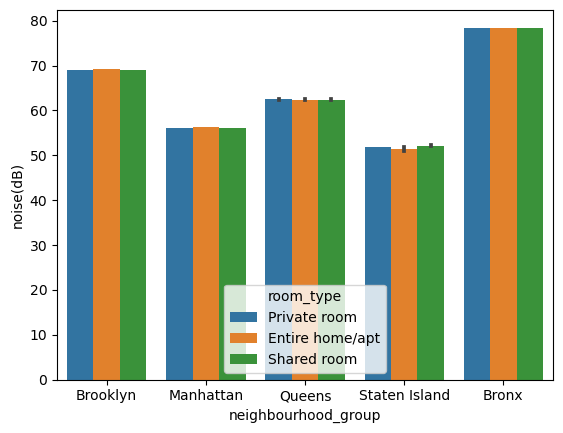

In [90]:
sns.barplot(x = 'neighbourhood_group',
            y = 'noise(dB)',
            hue='room_type',
            data=bnb)
plt.show()

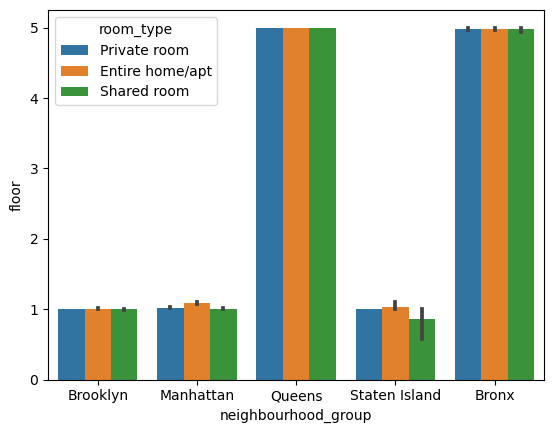

In [91]:
sns.barplot(x = 'neighbourhood_group',
            y = 'floor',
            hue='room_type',
            data=bnb)
plt.show()

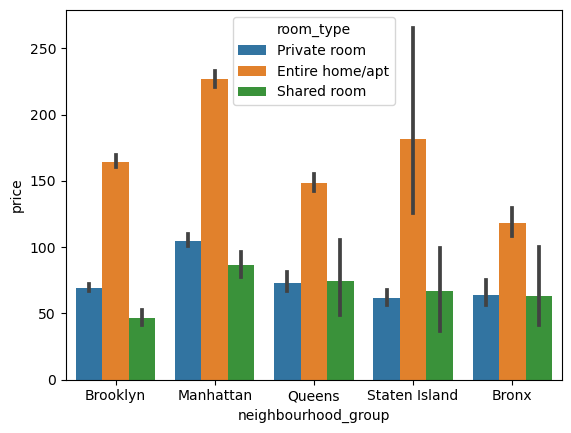

In [92]:
sns.barplot(x = 'neighbourhood_group',
            y = 'price',
            hue='room_type',
            data=bnb)
plt.show()

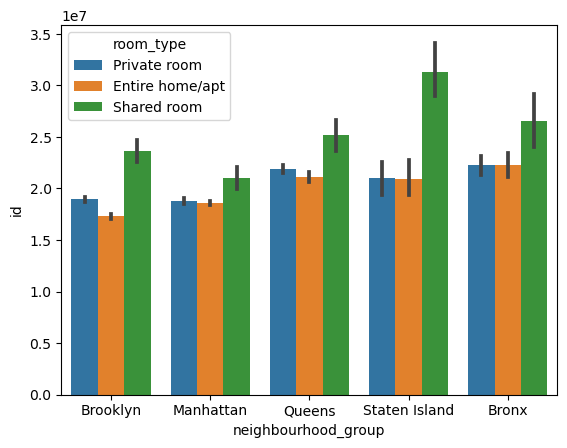

In [93]:
sns.barplot(x = 'neighbourhood_group',
            y = 'id',
            hue='room_type',
            data=bnb)
plt.show()

In [94]:
bnb.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

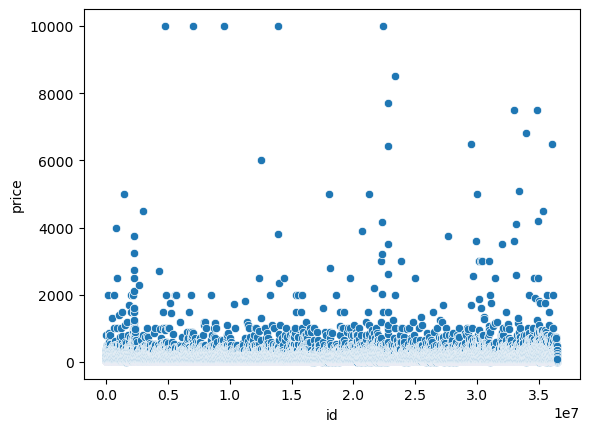

In [95]:
sns.scatterplot(x = 'id',
                y ='price',
                data=bnb)
plt.show()

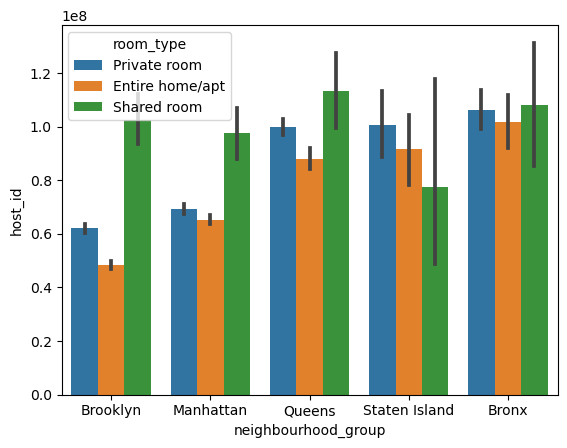

In [96]:
sns.barplot(x = 'neighbourhood_group',
            y = 'host_id',
            hue='room_type',
            data=bnb)
plt.show()

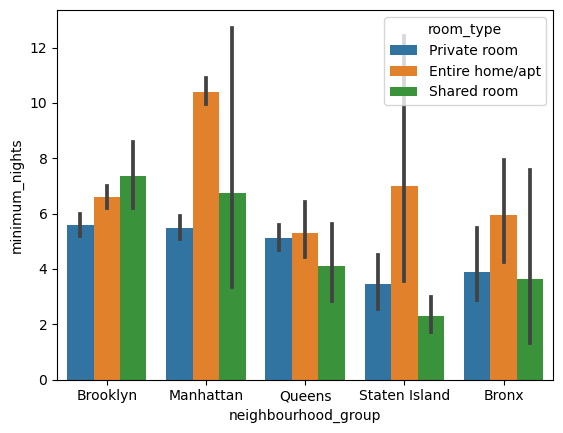

In [97]:
sns.barplot(x = 'neighbourhood_group',
            y = 'minimum_nights',
            hue='room_type',
            data=bnb)
plt.show()

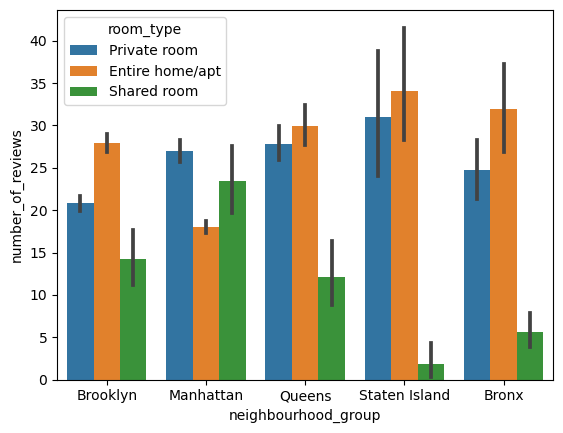

In [98]:
sns.barplot(x = 'neighbourhood_group',
            y = 'number_of_reviews',
            hue='room_type',
            data=bnb)
plt.show()

In [100]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'Location'],
      dtype='object')

In [101]:
df_corr = bnb[['id','host_id','latitude','longitude','price','minimum_nights',
    'number_of_reviews', 'reviews_per_month','floor','noise(dB)']].dropna().corr()

In [102]:
df_corr['price']

id                   0.005192
host_id              0.018491
latitude             0.024284
longitude           -0.135317
price                1.000000
minimum_nights       0.031425
number_of_reviews   -0.032292
reviews_per_month   -0.020649
floor                0.068257
noise(dB)           -0.065190
Name: price, dtype: float64

<Axes: >

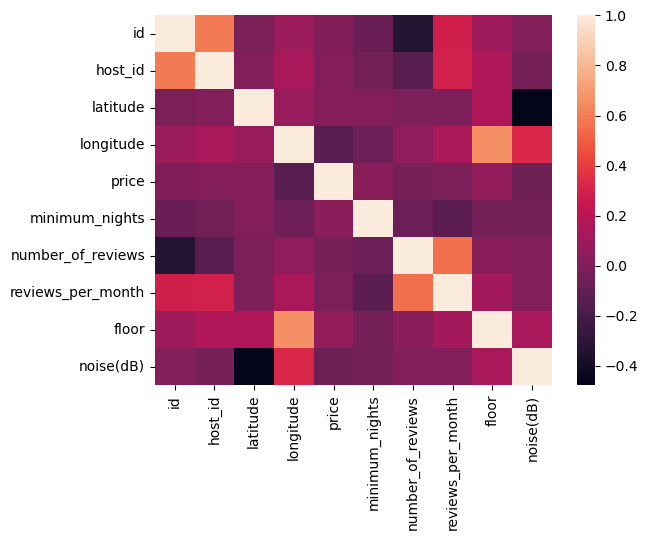

In [103]:
sns.heatmap(df_corr)

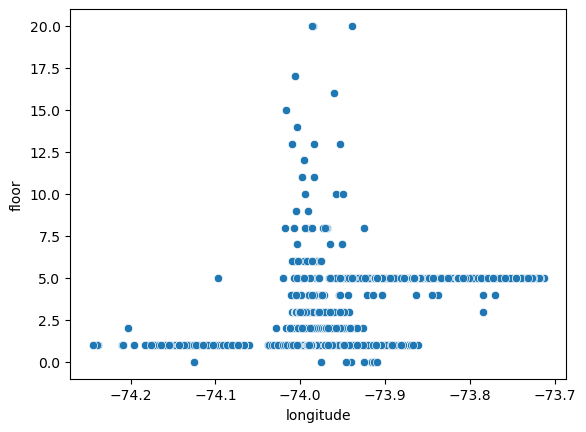

In [104]:
sns.scatterplot(x = 'longitude',
                y ='floor',
                data=bnb)
plt.show()

<Axes: ylabel='neighbourhood'>

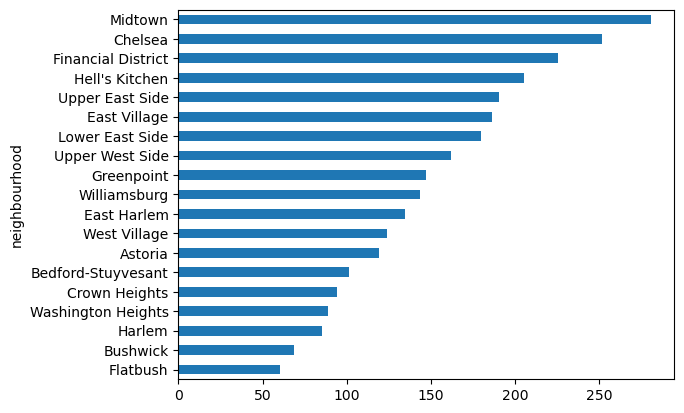

In [105]:
bnb.groupby('neighbourhood')['price'] \
    .agg(['mean','count']) \
    .query('count >= 500') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh')

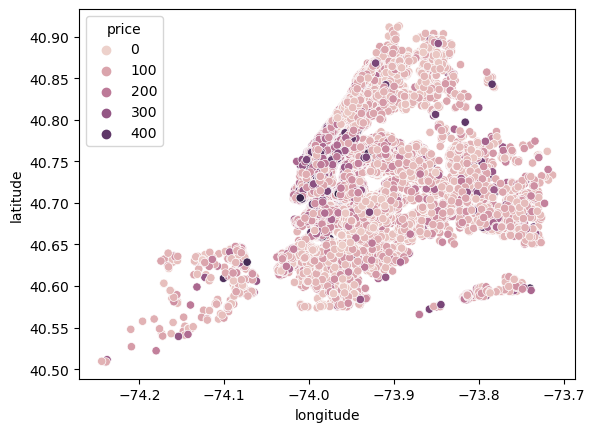

In [106]:
sns.scatterplot(x = 'longitude',
                y ='latitude',
                hue= 'price',
                data=bnb.query('price < 500'))
plt.show()

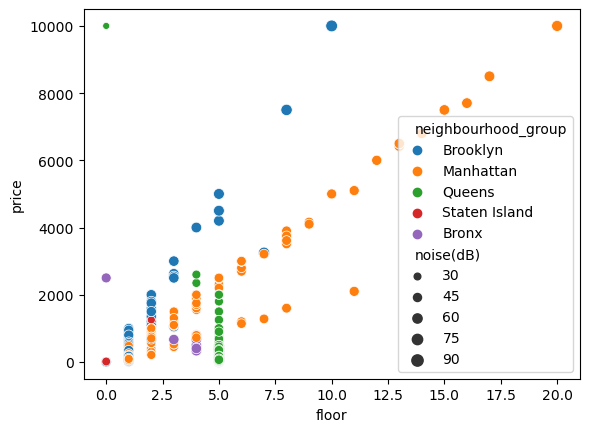

In [107]:
sns.scatterplot(x = 'floor',
                y ='price',
                hue='neighbourhood_group',
                size = 'noise(dB)',
                data=bnb)
plt.show()

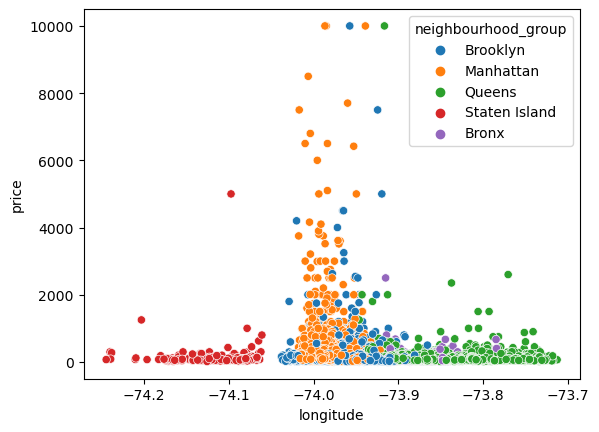

In [108]:
sns.scatterplot(x = 'longitude',
                y ='price',
                hue='neighbourhood_group',
                data=bnb)
plt.show()

In [109]:
staten = bnb[bnb['neighbourhood_group']=='Staten Island']

In [110]:
rooms = staten[staten['room_type']!='Entire home/apt']

In [111]:
rooms[rooms['room_type']=='Shared room']['price'].mean()

66.85714285714286

In [112]:
rooms[rooms['room_type']=='Private room']['price'].mean()

61.42857142857143

In [115]:
staten.head()

id                                name  host_id  \
138   42882           New York room with a view   185978   
206   62461         B NYC Staten Alternative...   303939   
207   62787         C Private Room By The Ferry   303939   
211   63320  D Private Che@p Room 2 Explore NYC   303939   
492  225976  Sunny cozy multileveled apartment!  1177947   

                host_name neighbourhood_group  neighbourhood  latitude  \
138  Newyorkroomwithaview       Staten Island     St. George  40.64524   
206              Lissette       Staten Island  Tompkinsville  40.63627   
207              Lissette       Staten Island  Tompkinsville  40.63518   
211              Lissette       Staten Island  Tompkinsville  40.63481   
492                Marina       Staten Island    Shore Acres  40.61077   

     longitude        room_type  price  minimum_nights  number_of_reviews  \
138  -74.08088     Private room   70.0               2                166   
206  -74.08543     Private room   37.0               2                147   
207  -74.08546     Private room   37.0               2                177   
211  -74.08519     Private room   36.0               2                333   
492  -74.06824  Entire home/apt   75.0               6                 76   

    last_review  reviews_per_month  floor  noise(dB)  \
138  2019-06-13               1.66      1   51.96436   
206  2019-06-10               1.44      1   51.96436   
207  2019-07-02               1.71      1   51.96436   
211  2019-07-02               3.19      1   51.96436   
492  2019-06-13               0.80      1   51.96436   

                                              Location  
138  Curtis High School, 105, Hamilton Avenue, Sain...  
206  516, Jersey Street, Tompkinsville, Staten Isla...  
207  38, Castleton Avenue, Tompkinsville, Staten Is...  
211  299, Victory Boulevard, Tompkinsville, Staten ...  
492  109, Saint Johns Avenue, Rosebank, Staten Isla...

In [116]:
rooms.head()

id                                 name  host_id  \
138   42882            New York room with a view   185978   
206   62461          B NYC Staten Alternative...   303939   
207   62787          C Private Room By The Ferry   303939   
211   63320   D Private Che@p Room 2 Explore NYC   303939   
579  258876  Affordable rooms,all transportation  1360198   

                host_name neighbourhood_group  neighbourhood  latitude  \
138  Newyorkroomwithaview       Staten Island     St. George  40.64524   
206              Lissette       Staten Island  Tompkinsville  40.63627   
207              Lissette       Staten Island  Tompkinsville  40.63518   
211              Lissette       Staten Island  Tompkinsville  40.63481   
579                Marina       Staten Island       Arrochar  40.59101   

     longitude     room_type  price  minimum_nights  number_of_reviews  \
138  -74.08088  Private room   70.0               2                166   
206  -74.08543  Private room   37.0               2                147   
207  -74.08546  Private room   37.0               2                177   
211  -74.08519  Private room   36.0               2                333   
579  -74.06685  Private room   50.0               7                  0   

    last_review  reviews_per_month  floor  noise(dB)  \
138  2019-06-13               1.66      1   51.96436   
206  2019-06-10               1.44      1   51.96436   
207  2019-07-02               1.71      1   51.96436   
211  2019-07-02               3.19      1   51.96436   
579         NaT                NaN      1   51.96436   

                                              Location  
138  Curtis High School, 105, Hamilton Avenue, Sain...  
206  516, Jersey Street, Tompkinsville, Staten Isla...  
207  38, Castleton Avenue, Tompkinsville, Staten Is...  
211  299, Victory Boulevard, Tompkinsville, Staten ...  
579  375, Sand Lane, South Beach, Staten Island, Ci...